# Fast two-peak von Mises fit

The two-peak von Mises to fit to data points 
$$x = \begin{pmatrix}x_0\\ \vdots \\ x_{N-1}\end{pmatrix}$$ 
measured at uniformly distributed locations 
$$\varphi = \begin{pmatrix} \varphi_0 \\ \vdots \\ \varphi_{N-1} \end{pmatrix} \quad \varphi_k = \frac{2k\pi}{N}$$

is defined as 
$$ v = a_0 + a_1 g(\varphi) + a_2 g(\varphi-\pi)$$
where
$$g(\varphi) = e^{-w\left(1+\cos(\varphi - \theta)\right)}$$
The fit has five scalar parameters $a_0$, $a_1$, $a_2$, $w$, and $\theta$.



## Step 1. Remove offset and orthogonalize basis:
The least-squares fit will not be affected if both the data and the fitted functions have zero mean.  Subtracting the mean is a fast operation that does not affect the other parameters.  Therefore, let's modify the fitted functions as:
$$\dot g(\varphi) = g(\varphi) - \bar g$$ where $\bar g = \sum\limits_{k=0}^{N-1} g(\varphi_k)$ and fit the function 
$$v=a_1 \dot g(\varphi) + a_2 \dot g(\varphi-\pi) = a^\top G$$ with $$a=\begin{pmatrix}a_1 \\ a_2 \end{pmatrix}$$ and 
$$G = \begin{pmatrix} \dot g_1^\top(\varphi) \\ \dot g_2^\top(\varphi)\end{pmatrix}$$
to the data $\dot x_k = x_k-\bar x$ where $\bar x = \sum\limits_{k=0}^{N-1}x_k$.

The least squares fit is then $$\hat a = G^\dagger \dot x$$

The pseudo-inverse matrix $$G^\dagger(\theta, w)= \left(G G^\top \right)^{-1} G$$ is independent of $x$ and can be precomputed for a set of values of $w$ and $\theta$ to.

## Step 2: Optimize for preferred direction
Optimization for preferred direction is a convex problem when the sharpness is low or when the solution is close.  Therefore, we begin with low sharpness and optimize for preferred direction $\theta$ first and for sharpness $w$ simultaneous but at a slow conservative rate.

The initial estimate of $\theta$ can be computed quickly by measuring the circular mean of the doubled angle.  
$$\theta_0 = \tfrac 1 2 \arg \left(x^T e^{2 i \varphi}\right)$$
When the underlying data are well fitted with a 2-peak von Mises, this estimate will already approach the optimal value.  We will only assume that it is within 8$^\circ$ of the optimum and perform binary search.  Binary search with 1-degree precision will therefore take three steps.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from vonfit import von_mises2, fit_von_mises2, bootstrap_von_mises2

In [3]:
# model
N = 30

theta = np.random.uniform(0,2*pi)
w = 8
a0 = 0.5
a1 = 3.0
a2 = 1.2

# data
phi = r_[0:2*pi:2*pi/N]
sigma = 0.5
x = von_mises2(phi, a0, a1, a2, theta, w) + np.random.randn(*phi.shape)*sigma

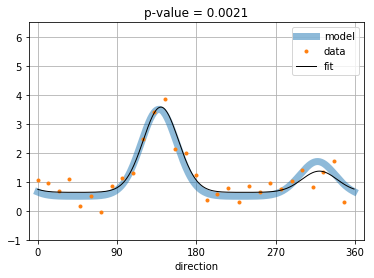

In [4]:
# plot fit results
t = r_[0:2*pi:pi/180]
plot(t/pi*180, von_mises2(t, a0, a1, a2, theta, w), lw=7, alpha=0.5)
plot(phi*180/pi, x, '.')

xticks(r_[0:361:90])
xlabel('direction')
grid('on')
xlim(-10, 370)
ylim(-2*sigma, a0 + a1*(1+maximum(sigma, 0.05)*2));

v, r2, p = bootstrap_von_mises2(phi, x)
plot(t*180/pi, von_mises2(t, *v), lw=1, c='k')
title('p-value = %g' % p)

legend(('model', 'data', 'fit'));

In [5]:
%timeit fit_von_mises2(phi, x)

631 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
